## Task 1: Import data

Import data from NLTK (see http://www.nltk.org/book_1ed/ch02.html), for example, using the Gutenberg dataset:

In [ ]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
for fileid in gutenberg.fileids():
    print(fileid, gutenberg.raw(fileid)[:65])

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
austen-emma.txt [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse,
austen-persuasion.txt [Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot,
austen-sense.txt [Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The fami
bible-kjv.txt [The King James Bible]

The Old Testament of the King James Bible
blake-poems.txt [Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERI
bryant-stories.txt [Stories to Tell to Children by Sara Cone Bryant 1918] 


TWO 
burgess-busterbrown.txt [The Adventures of Buster Bear by Thornton W. Burgess 1920]

I
carroll-alice.txt [Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER
chesterton-ball.txt [The Ball and The Cross by G.K. Chesterton 1909]


I. A DISCUSSIO
chesterton-brown.txt [The Wisdom of Father Brown by G. K. Chesterton 1914]


I. The Ab
chesterton-thursday.txt [The Man Who Was

## Task 2: Use NLTK's FreqDist functionality

Use the `FreqDist` functionality as shown in https://www.nltk.org/book/ch01.html and http://www.nltk.org/book_1ed/ch02.html. 

For the datasets available via NLTK you can either apply tokenization with `word_tokenize` or rely on the `.word` functionality, which provides you with tokenized output:

In [ ]:
fdist1 = nltk.FreqDist(gutenberg.words("austen-emma.txt"))
# Print out most frequent 50 words with their counts. 
# Hint: you need to use most_common(number_of_words) method applied to fdist1
fdist1.most_common(50)

[(',', 11454),
 ('.', 6928),
 ('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 (';', 2199),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('"', 2004),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('--', 1382),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301),
 ('is', 1220),
 ('with', 1187),
 ('Mr', 1153),
 ('very', 1151),
 ('but', 1148),
 ('."', 1138),
 ('his', 1088),
 ("'", 1007),
 ('at', 997),
 ('s', 933),
 ('so', 924),
 ('Emma', 865),
 ('all', 835),
 ('could', 825),
 ('would', 815),
 ('been', 759),
 ('him', 758),
 ('Mrs', 699),
 ('.--', 685),
 ('on', 677),
 ('any', 651),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 591)]

What can you tell about the most frequent words in this text?

Let's try visualising cumulative frequency of the most frequent $30$ words:

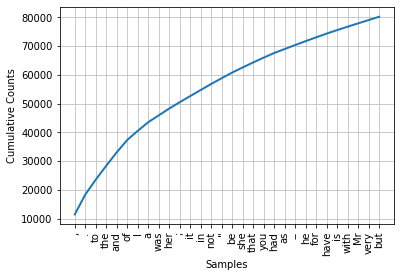

In [ ]:
# Hint: you need to use plot(number_of_words, cumulative=True) method applied to fdist1
fdist1.plot(30,cumulative=True)

What does this plot suggest?

## Task 3: Implement FreqDist from scratch

Collect words, calculate their frequency, and return a dictionary sorted in the reverse order:

In [ ]:
import operator

def collect_word_map(word_list):
    word_map = {}
    for a_word in word_list:
        word_map[a_word] = word_map.get(a_word,0) +1
                            # update the count for a_word in word_map by 1. 
                           # Hint: word_map.get(a_word) returns the current count,
                           #       word_map.get(a_word, 0) allows you to cover cases where current word count is 0 
    return word_map
    
# Let's sort the word frequency map by word counts, 
# starting from the largest count (reverse order), 
# and print up to 10 most frequent words
word_map = collect_word_map(gutenberg.words("austen-emma.txt"))
sorted_map = (sorted(word_map.items(), key=operator.itemgetter(1)))[::-1]
print(sorted_map[:10])

[(',', 11454), ('.', 6928), ('to', 5183), ('the', 4844), ('and', 4672), ('of', 4279), ('I', 3178), ('a', 3004), ('was', 2385), ('her', 2381)]


Let's calculate the percentage of the content covered by specific (most frequent) words. E.g., what percentage of words used in text are commas?

In [ ]:
def collect_percentage_map(word_map, up_to):
    total_count = sum(word_map.values())
    sorted_map = (sorted(word_map.items(), key=operator.itemgetter(1)))[::-1] #sort the word frequency map by word counts, starting from the largest count (reverse order)
    percentage_map = [(item[0], 100*float(item[1])/float(total_count)) for item in sorted_map[:up_to]]
    return percentage_map

print(collect_percentage_map(word_map, 50))

[(',', 5.952387139018953), ('.', 3.60032635752779), ('to', 2.6934889594495575), ('the', 2.5173182557541303), ('and', 2.4279337099263616), ('of', 2.2237004162617513), ('I', 1.6515353874456287), ('a', 1.5611114864338165), ('was', 1.2394310569722544), ('her', 1.2373523466041667), (';', 1.1427710248561793), ('it', 1.1058739158226236), ('in', 1.1006771399024045), ('not', 1.091842620838032), ('"', 1.0414338944119068), ('be', 1.0237648562831618), ('she', 0.9239867586149553), ('that', 0.8990422341979036), ('you', 0.8714993218207424), ('had', 0.8346022127871868), ('as', 0.7207928201343886), ('--', 0.718194432174279), ('he', 0.7093599131099066), ('for', 0.6864940990609426), ('have', 0.6761005472205044), ('is', 0.6340066622667297), ('with', 0.6168573017300067), ('Mr', 0.5991882636012618), ('very', 0.5981489084172179), ('but', 0.5965898756411522), ('."', 0.5913930997209331), ('his', 0.5654092201198376), ("'", 0.523315335166063), ('at', 0.5181185592458438), ('s', 0.4848591933564417), ('so', 0.48018

Finally, let's visualise the cumulative frequency counts as a histogram:

Total cumulative coverage = 50.05%


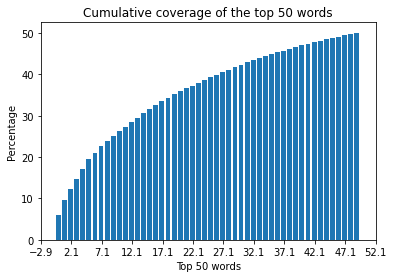

In [ ]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

def visualise_dist(word_map, up_to):
    width = 10.0
    percentage_map = collect_percentage_map(word_map, up_to)# apply collect_percentage_map from above
    sort_map = {}
    rank = 0
    cum_sum = 0
    # Store cumulative percetage of coverage
    for item in percentage_map:
        rank += 1
        cum_sum += item[1]
        sort_map[rank] = cum_sum
    # How much do the top n words account for?
    print("Total cumulative coverage = %.2f" % cum_sum + "%")
    
    fig, ax = plt.subplots()
    plt.title("Cumulative coverage of the top " + str(up_to) + " words")
    plt.ylabel("Percentage")
    plt.xlabel("Top " + str(up_to) + " words")
    # Build the histogram for the percentages
    plt.bar(range(len(sort_map)), sort_map.values())
    # Label x axis with the ranks of the 1st to n-th most frequent word
    # printing out each 5-th label on the axis
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end+1, 5))
    plt.show()
    
# Explore statistics with a different number of top n words
visualise_dist(word_map, 50)    

What does this cumulative distribution suggest?

## Task 4: Apply to other texts

This is an open-ended task.


-------------For word in file austen-emma.txt-----------


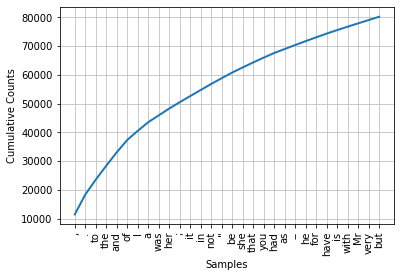

[(',', 5.952387139018953), ('.', 3.60032635752779), ('to', 2.6934889594495575), ('the', 2.5173182557541303), ('and', 2.4279337099263616), ('of', 2.2237004162617513), ('I', 1.6515353874456287), ('a', 1.5611114864338165), ('was', 1.2394310569722544), ('her', 1.2373523466041667), (';', 1.1427710248561793), ('it', 1.1058739158226236), ('in', 1.1006771399024045), ('not', 1.091842620838032), ('"', 1.0414338944119068), ('be', 1.0237648562831618), ('she', 0.9239867586149553), ('that', 0.8990422341979036), ('you', 0.8714993218207424), ('had', 0.8346022127871868), ('as', 0.7207928201343886), ('--', 0.718194432174279), ('he', 0.7093599131099066), ('for', 0.6864940990609426), ('have', 0.6761005472205044), ('is', 0.6340066622667297), ('with', 0.6168573017300067), ('Mr', 0.5991882636012618), ('very', 0.5981489084172179), ('but', 0.5965898756411522), ('."', 0.5913930997209331), ('his', 0.5654092201198376), ("'", 0.523315335166063), ('at', 0.5181185592458438), ('s', 0.4848591933564417), ('so', 0.48018

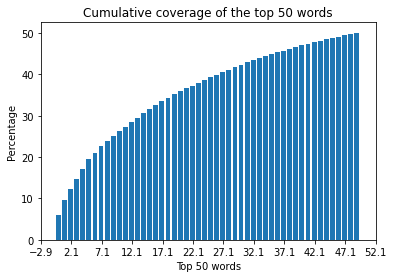





-------------For word in file austen-persuasion.txt-----------


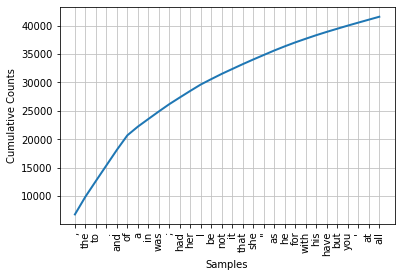

[(',', 6.875757606625174), ('the', 3.1781279603956363), ('to', 2.8267003493903493), ('.', 2.7920669036680894), ('and', 2.790029642155015), ('of', 2.6117692597610294), ('a', 1.5574864267451691), ('in', 1.3710769982988866), ('was', 1.3547789061942936), (';', 1.314033675932811), ('had', 1.198928400444123), ('her', 1.1805930468264558), ('I', 1.1449409703476587), ('be', 0.9666805879536726), ('not', 0.9432520805533202), ('it', 0.8729665583522629), ('that', 0.8688920353261146), ('she', 0.8342585896038545), ('"', 0.8077741899338908), ('as', 0.8016624053946685), ('he', 0.7497122368112783), ('for', 0.7079483757932588), ('with', 0.6549795764533314), ('his', 0.6366442228356644), ('have', 0.5938617310611076), ('but', 0.5633028083649958), ('you', 0.5582096545823104), ("'", 0.534781147181958), ('at', 0.5286693626427357), ('all', 0.5266321011296615), ('Anne', 0.5062594859989202), ('been', 0.5052408552423832), ('s', 0.4940359169204755), ('him', 0.47570056330280835), ('could', 0.4522720559024559), ('wer

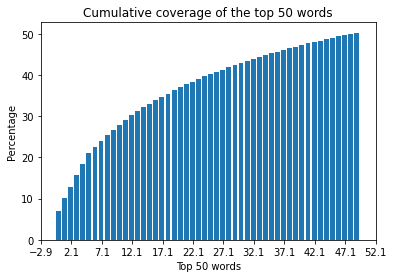





-------------For word in file austen-sense.txt-----------


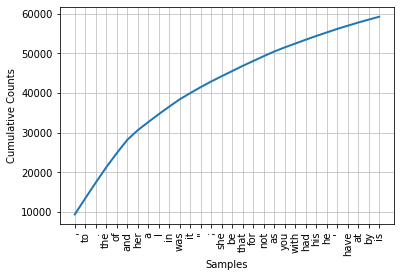

[(',', 6.637424422218455), ('to', 2.8698366954851107), ('.', 2.8076792676724867), ('the', 2.727157145278861), ('of', 2.5180821608182176), ('and', 2.366220263321467), ('her', 1.7206306153585353), ('a', 1.443041193422614), ('I', 1.4154941515511104), ('in', 1.344860710854947), ('was', 1.3038933152511725), ('it', 1.107532350115839), ('"', 1.0637396168842177), (';', 1.0022885234785557), ('she', 0.9415437644798553), ('be', 0.9217664010849297), ('that', 0.9161157258292366), ('for', 0.8716166581906538), ('not', 0.8560773012374979), ('as', 0.832768265807764), ('you', 0.7324687800192123), ('with', 0.6858507091597446), ('had', 0.6844380403458213), ('his', 0.6646606769508956), ('he', 0.6321692942306606), ("'", 0.623693281347121), ('have', 0.5700118664180369), ('at', 0.5693055320110754), ('by', 0.5205684579307227), ('is', 0.5142114482680681), ('."', 0.5092671074193366), ('s', 0.49443408487314233), ('Elinor', 0.48313273436175624), ('on', 0.4774820591060632), ('all', 0.4534666892693677), ('him', 0.44

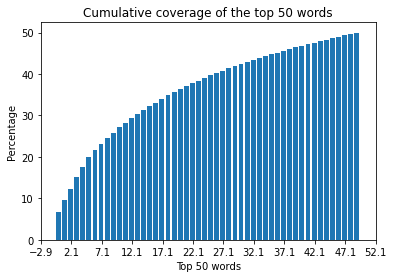





-------------For word in file bible-kjv.txt-----------


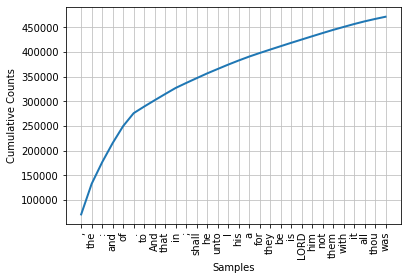

[(',', 6.97657160610852), ('the', 6.144832949753328), (':', 4.330463244592115), ('and', 3.843748701335967), ('of', 3.411652256855462), ('.', 2.5884229419761855), ('to', 1.325478353620527), ('And', 1.2710581465071131), ('that', 1.2443427721059828), ('in', 1.2201010434827348), (';', 0.9977697609666611), ('shall', 0.9657113116853048), ('he', 0.9563114577293514), ('unto', 0.8845757301707607), ('I', 0.8760663886948451), ('his', 0.8296607939017705), ('a', 0.785926736548809), ('for', 0.7151804673013712), ('they', 0.6896524428736244), ('be', 0.6804504805799018), ('is', 0.6759979181797133), ('LORD', 0.6580887227478445), ('him', 0.6578908310856139), ('not', 0.6483920312985453), ('them', 0.6357269649157872), ('with', 0.5898160992782892), ('it', 0.5828898911002183), ('all', 0.5368800796316049), ('thou', 0.4838451141538054), ('was', 0.44674042748556875), ('thy', 0.4403089484630744), ('which', 0.4237849946668197), ('my', 0.40914101166175565), ('God', 0.4071620950394497), ('me', 0.4048863409237979), 

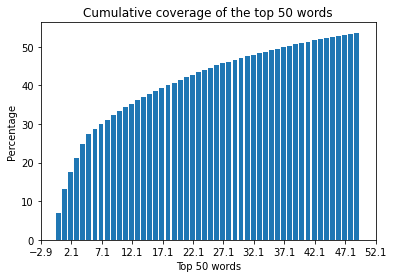





-------------For word in file blake-poems.txt-----------


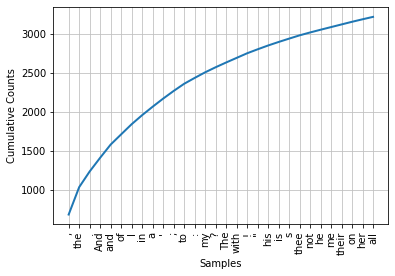

[(',', 8.139813263107493), ('the', 4.2015800813981325), ('.', 2.406033038065597), ('And', 2.1067751975101747), ('and', 2.0229830021546564), ('of', 1.5681110845104143), ('I', 1.5561407708881974), ('in', 1.3885563801771605), ('a', 1.2927938711994253), ("'", 1.2449126167105578), (';', 1.1730907349772564), ('to', 1.101268853243955), (':', 0.8977735216662677), ('my', 0.861862580799617), ('?', 0.7780703854440987), ('The', 0.7301891309552311), ('!', 0.7062485037107972), ('with', 0.7062485037107972), ('"', 0.610485994733062), ('his', 0.5865453674886282), ('is', 0.5386641129997606), ('s', 0.5147234857553268), ('thee', 0.5027531721331099), ('not', 0.4429016040220254), ('he', 0.4189609767775916), ('on', 0.4069906631553747), ('their', 0.4069906631553747), ('me', 0.4069906631553747), ('her', 0.3830500359109409), ('all', 0.371079722288724), ('was', 0.35910940866650704), ('they', 0.35910940866650704), ('like', 0.34713909504429014), ('thou', 0.33516878142207324), ('from', 0.33516878142207324), ('thy',

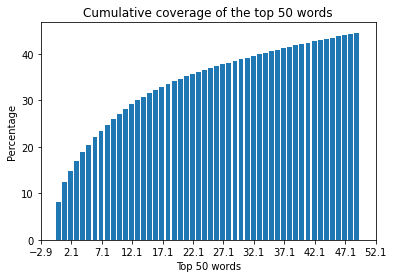





-------------For word in file bryant-stories.txt-----------


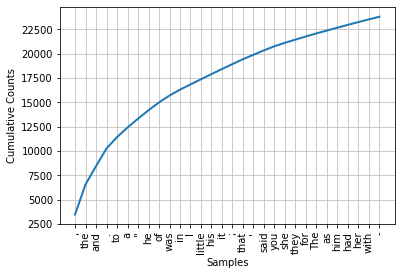

[(',', 6.26496049529363), ('the', 5.5540557565286255), ('and', 3.3709482929287478), ('.', 3.2701617983190254), ('to', 2.096719039648687), ('a', 1.778161726328672), ('"', 1.6197829490848226), ('he', 1.5693897017799614), ('of', 1.441606824685492), ('was', 1.2706297356154275), ('in', 1.092453611216097), ('I', 0.9646707341216277), ('little', 0.9574716987923618), ('his', 0.9556719399600454), ('it', 0.9268757986429819), (';', 0.9232762809783489), ('that', 0.8962798984936019), ("'", 0.8224897863686266), ('said', 0.8134909922070442), ('you', 0.7540989507406007), ('she', 0.647913179633929), ('they', 0.5903208969998021), ('for', 0.5795223440059032), ('The', 0.5579252380181056), ('as', 0.5363281320303079), ('him', 0.5273293378687256), ('had', 0.5255295790364091), ('her', 0.5111315083778774), ('with', 0.4967334377193456), ('-', 0.48593488472544677), (',"', 0.4787358493961809), ('on', 0.4553389845760668), ('!', 0.45353922574375033), ('is', 0.42834260209131975), ('so', 0.41394453143278803), ('all', 

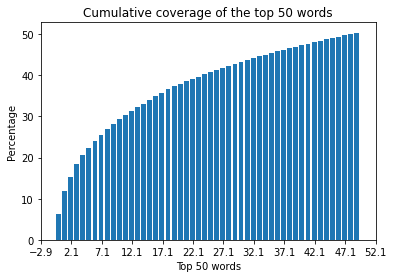





-------------For word in file burgess-busterbrown.txt-----------


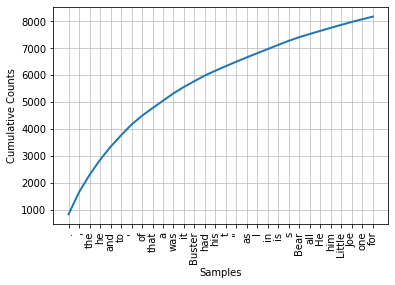

[('.', 4.340030585877762), (',', 4.334757158677425), ('the', 3.369719981015662), ('he', 2.9636660865896745), ('and', 2.5523387649633498), ('to', 2.2464799873437746), ("'", 2.1146443073353374), ('of', 1.7191372673100247), ('that', 1.5029267520961873), ('a', 1.4501924800928123), ('was', 1.444919052892475), ('it', 1.2603491008806624), ('Buster', 1.1390602752728998), ('had', 1.1126931392712123), ('his', 0.9333966144597374), ('t', 0.8964826240573749), ('"', 0.8753889152560249), ('as', 0.8437483520539999), ('I', 0.8226546432526499), ('is', 0.8121077888519749), ('in', 0.8121077888519749), ('s', 0.7962875072509624), ('Bear', 0.7224595264462375), ('He', 0.61171755523915), ('all', 0.61171755523915), ('him', 0.5958972736381374), ('Little', 0.5853504192374624), ('Joe', 0.5695301376364499), ('one', 0.5220692928334124), ('for', 0.5115224384327375), ('Brown', 0.5009755840320624), ('Farmer', 0.4957021568317249), ('at', 0.48515530243104993), ('little', 0.48515530243104993), ('so', 0.47988187523071246),

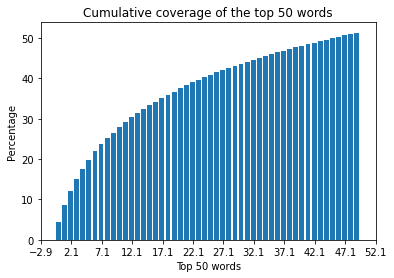





-------------For word in file carroll-alice.txt-----------


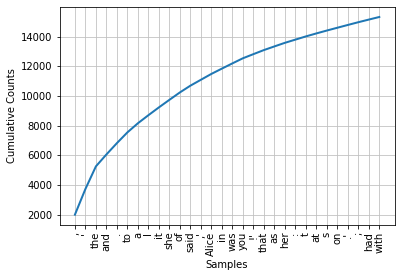

[(',', 5.84286133098798), ("'", 5.074758135444151), ('the', 4.476693051890941), ('and', 2.3512166520082087), ('.', 2.239812371738493), ('to', 2.125476399882732), ('a', 1.8029903254177662), ('I', 1.5919085312225154), ('it', 1.5450014658457931), ('she', 1.4922310172969804), ('of', 1.4658457930225741), ('said', 1.3368513632365875), (",'", 1.1638815596599237), ('Alice', 1.1609498680738786), ('in', 1.046613896218118), ('was', 1.0319554382878922), ('you', 1.0114335971855761), ("!'", 0.8150102609205512), ('that', 0.8062151861624157), ('as', 0.7211961301671064), ('her', 0.712401055408971), ('t', 0.633245382585752), (':', 0.633245382585752), ('at', 0.5922017003811199), ('s', 0.5716798592788038), ('on', 0.554089709762533), (".'", 0.5482263265904427), (';', 0.5452946350043976), ('had', 0.5189094107299912), ('with', 0.513046027557901), ('all', 0.5071826443858106), ('!', 0.45441219583699793), ("?'", 0.4514805042509528), ('be', 0.42509527997654645), ('-', 0.4133685136323659), ('--', 0.41043682204632

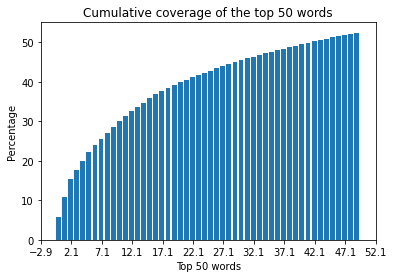





-------------For word in file chesterton-ball.txt-----------


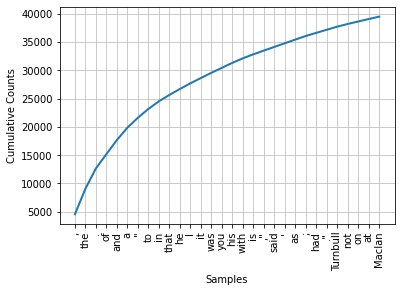

[(',', 4.687822178234154), ('the', 4.6630788898511275), ('.', 3.7001525836116955), ('of', 2.6073240133613758), ('and', 2.565054229040373), ('a', 2.2516392428553753), ('"', 1.8052290816116128), ('to', 1.6062518041981113), ('in', 1.396964823291682), ('that', 1.1546867912078849), ('he', 1.0835498371066847), ('I', 1.0309703492927544), ('it', 0.9670501876366036), ('was', 0.9505546620479195), ('you', 0.9093158480762094), ('his', 0.9072539073776238), ('with', 0.8237453090849107), ('is', 0.7319889479978556), (',"', 0.6773475194853396), ('said', 0.6721926677388759), ("'", 0.6701307270402903), ('as', 0.6660068456431193), (';', 0.6536352014516063), ('had', 0.5732195142067714), ('."', 0.5670336921110148), ('Turnbull', 0.5608478700152584), ('not', 0.4938347973112293), ('on', 0.45053404264093366), ('at', 0.44537919089446987), ('MacIan', 0.4381623984494206), ('The', 0.43197657635366404), ('for', 0.4268217246072003), ('be', 0.4134191100663945), ('-', 0.39898552517629593), ('or', 0.3927997030805394), (

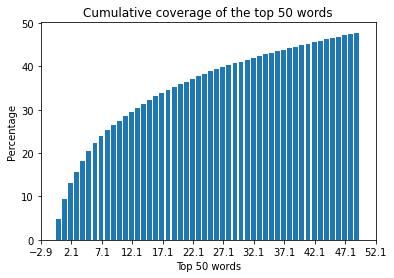





-------------For word in file chesterton-brown.txt-----------


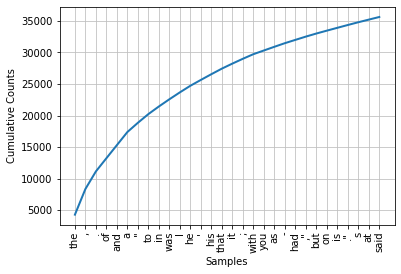

[('the', 5.02074062024331), (',', 4.727931863867167), ('.', 3.2348395942507233), ('of', 2.424967756178613), ('a', 2.4098625425560347), ('and', 2.4098625425560347), ('"', 1.6975936232759723), ('to', 1.6011526439933537), ('in', 1.4001371088621126), ('was', 1.3257729802586478), ('I', 1.2699998838060491), ('he', 1.2165506663723087), ("'", 1.0736321067125245), ('his', 1.0538791350522292), ('that', 1.0225067682976425), ('it', 0.9249038495055948), (';', 0.8877217852038622), ('with', 0.843568083845555), ('you', 0.6808965525254755), ('as', 0.6797346130160464), ('-', 0.6657913389028968), ('had', 0.6053704844125815), (',"', 0.6042085449031523), ('but', 0.5658645410919908), ('on', 0.5298444162996875), ('is', 0.5228727792431126), ('."', 0.5159011421865378), ('s', 0.5089295051299629), ('at', 0.4833668359225219), ('said', 0.4822048964130927), ('for', 0.44967059014907684), ('him', 0.4368892555453563), ('The', 0.40203107026248214), ('like', 0.38111615909275764), ('not', 0.36368706645132054), ('He', 0.3

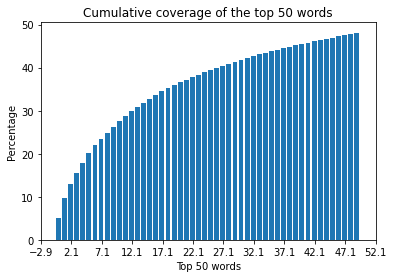





-------------For word in file chesterton-thursday.txt-----------


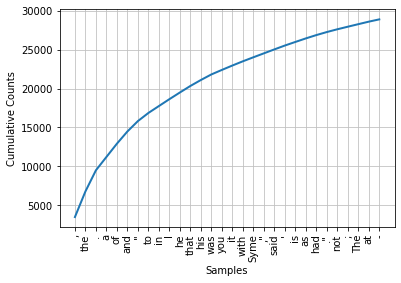

[(',', 5.039515697918021), ('the', 4.754887087685839), ('.', 3.925563116755523), ('a', 2.4749685752676522), ('of', 2.470634129426553), ('and', 2.265470359614523), ('"', 1.9302732145695174), ('to', 1.5098319679828933), ('in', 1.2829959689653678), ('I', 1.2786615231242686), ('he', 1.2396515105543757), ('that', 1.2150896507881468), ('his', 1.1052836894803), ('was', 1.034487740742346), ('you', 0.837992862612515), ('it', 0.8163206334070189), ('with', 0.7859795125193244), ('Syme', 0.7440798693886986), ('said', 0.7325213471457674), (',"', 0.7325213471457674), ("'", 0.7166283790617369), ('is', 0.6675046595292792), ('as', 0.6588357678470808), ('had', 0.616936124716455), ('."', 0.5649227746232645), ('not', 0.5129094245300738), (';', 0.4782338578012801), ('The', 0.4710097813994481), ('at', 0.4681201508387153), ('-', 0.4247756924277231), ('on', 0.4175516160258911), ('but', 0.4074379090633263), ('for', 0.40310346322222707), ('him', 0.4016586479418606), ('all', 0.40021383266149424), ('man', 0.392989

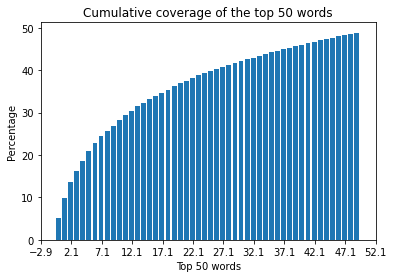





-------------For word in file edgeworth-parents.txt-----------


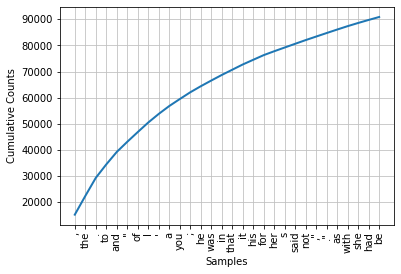

[(',', 7.224334600760456), ('the', 3.3935717235584795), ('.', 3.2967345950641547), ('to', 2.444662802675363), ('and', 2.2638052244580207), ('"', 1.841804208617555), ('of', 1.7706004376658455), ('I', 1.7354732439963354), ("'", 1.5631601182931982), ('a', 1.4321451797420526), ('you', 1.2641042802960178), (';', 1.2294517784328525), ('he', 1.099860915300741), ('was', 1.0353028296378577), ('in', 1.0106188557079316), ('that', 0.9541305307529087), ('it', 0.9531811471402192), ('his', 0.8534958678078257), ('for', 0.8487489497443784), ('her', 0.7053920242282697), ('s', 0.6783345912666201), ('said', 0.6778598994602754), ('not', 0.671688905977794), (',"', 0.6427327057907654), ('."', 0.6398845549526969), ('as', 0.6322894860511813), ('with', 0.6189981154735288), ('she', 0.5758011610961583), ('had', 0.5520665707789217), ('be', 0.534028282137822), ('at', 0.4979517048556225), ('but', 0.48228687524624636), ('him', 0.46472327841149136), ('is', 0.45760290131632037), ('have', 0.45380536686556255), ('my', 0.

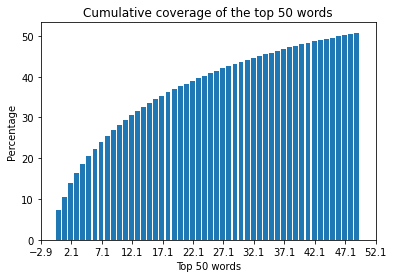





-------------For word in file melville-moby_dick.txt-----------


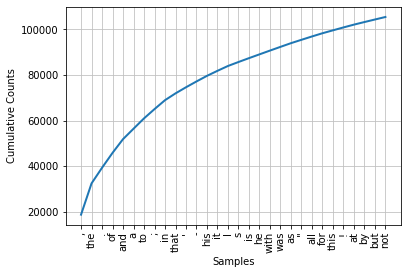

[(',', 7.174707364110743), ('the', 5.260736372733581), ('.', 2.630943297842565), ('of', 2.505952403774265), ('and', 2.3096476867099405), ('a', 1.7517895552087845), ('to', 1.7414375486448457), (';', 1.5612359529022042), ('in', 1.5014243594216679), ('that', 1.1433216138394826), ("'", 1.0290661339856375), ('-', 0.9784563241174914), ('his', 0.9427994126194794), ('it', 0.8469474999904149), ('I', 0.8143578496965328), ('s', 0.6667459042477734), ('is', 0.649875967625058), ('he', 0.6368401075075052), ('with', 0.6360732922064727), ('was', 0.6257212856425337), ('as', 0.6211203938363387), ('"', 0.5666765074630299), ('all', 0.5605419850547698), ('for', 0.5421384178299894), ('this', 0.49076179266081077), ('!', 0.4865443085051319), ('at', 0.4719748177855141), ('by', 0.4359344986369858), ('but', 0.4267327150245956), ('not', 0.422898638519433), ('--', 0.4102461860523965), ('him', 0.4056452942462014), ('from', 0.40334484834310386), ('be', 0.39490988003174615), ('on', 0.3853246887688397), ('so', 0.351968

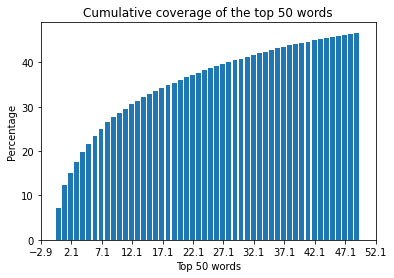





-------------For word in file milton-paradise.txt-----------


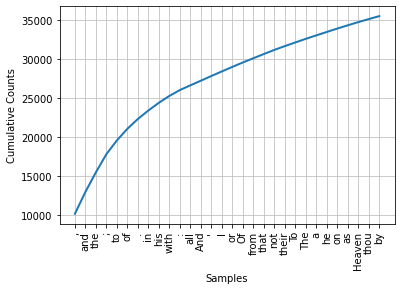

[(',', 10.532403821327136), ('and', 2.8907823392718823), ('the', 2.587141750580945), (';', 2.3929770203976246), ('to', 1.8156467854376452), ('of', 1.5347276013426285), ('.', 1.295120061967467), ('in', 1.1185127807900852), ('his', 1.0183320423444358), ('with', 0.9047250193648335), (':', 0.7725277562612961), ('all', 0.6238058352698167), ('And', 0.6155435063258456), ("'", 0.6145107152078492), ('I', 0.6083139684998708), ('or', 0.5969532662019107), ('Of', 0.5824941905499613), ('from', 0.5608055770720372), ('that', 0.5535760392460625), ('not', 0.544280919184095), ('their', 0.49987090111025045), ('To', 0.4854118254583011), ('The', 0.47818228763232634), ('a', 0.4564936741544023), ('he', 0.4492641363284276), ('on', 0.4482313452104312), ('as', 0.4296411050864963), ('Heaven', 0.4255099406145107), ('thou', 0.39452620707461916), ('by', 0.39246062483862637), ('but', 0.3821327136586625), ('thy', 0.35011618900077457), ('thee', 0.34805060676478183), ('they', 0.34598502452878904), ('this', 0.34495223341

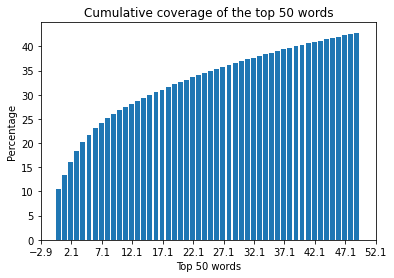





-------------For word in file shakespeare-caesar.txt-----------


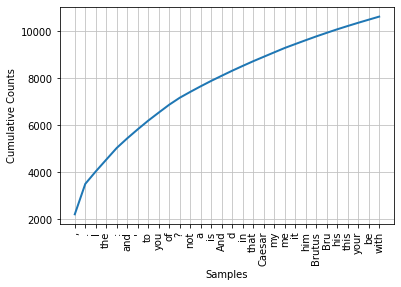

[(',', 8.531722989974064), ('.', 5.016838926953896), ('I', 2.055510393682499), ('the', 1.9432508806565245), (':', 1.931637827584872), ('and', 1.5832462354352959), ("'", 1.4864707931715249), ('to', 1.432276545503813), ('you', 1.3238880501683892), ('of', 1.3006619440250842), ('?', 1.1458212364030504), ('not', 0.9638834049471606), ('a', 0.929044245732203), ('is', 0.8903340688266945), ('And', 0.8438818565400844), ('d', 0.8322688034684319), ('in', 0.7896876088723725), ('that', 0.7742035381101692), ('Caesar', 0.7316223435141098), ('my', 0.7277513258235591), ('me', 0.7238803081330082), ('it', 0.6425889366314405), ('him', 0.6387179189408896), ('Brutus', 0.6232338481786862), ('Bru', 0.5922657066542794), ('his', 0.5806526535826269), ('this', 0.5458134943676692), ('your', 0.5303294236054659), ('be', 0.5109743351527116), ('with', 0.5071033174621608), ('will', 0.4993612820810591), ('he', 0.4993612820810591), ('haue', 0.49549026439050825), ('for', 0.4567800874849998), ('do', 0.425811945960593), ('so

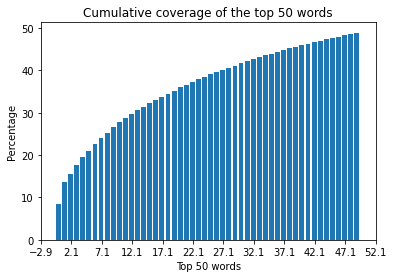





-------------For word in file shakespeare-hamlet.txt-----------


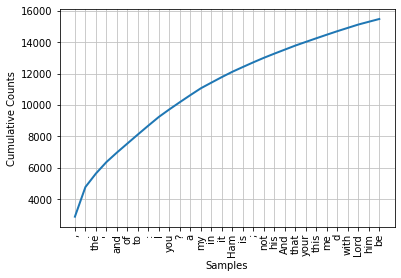

[(',', 7.740899357601713), ('.', 5.048179871520342), ('the', 2.3019271948608138), ("'", 1.9512847965738758), ('and', 1.6220556745182013), ('to', 1.5417558886509637), ('of', 1.5417558886509637), (':', 1.5123126338329764), ('I', 1.4801927194860813), ('you', 1.282119914346895), ('?', 1.2285867237687367), ('a', 1.2018201284796575), ('my', 1.1643468950749465), ('in', 0.9609207708779444), ('it', 0.9475374732334048), ('Ham', 0.9020342612419701), ('is', 0.8137044967880086), (';', 0.797644539614561), ('not', 0.765524625267666), ('his', 0.7119914346895075), ('that', 0.6879014989293362), ('And', 0.6879014989293362), ('your', 0.6236616702355461), ('this', 0.6209850107066381), ('me', 0.6076017130620985), ('d', 0.5968950749464668), ('with', 0.5674518201284796), ('Lord', 0.5647751605995718), ('him', 0.47644539614561027), ('be', 0.47109207708779444), ('King', 0.4603854389721627), ('for', 0.45235546038543895), ('haue', 0.43094218415417557), ('he', 0.4282655246252677), ('but', 0.39079229122055675), ('so

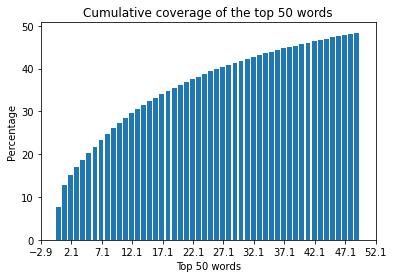





-------------For word in file shakespeare-macbeth.txt-----------


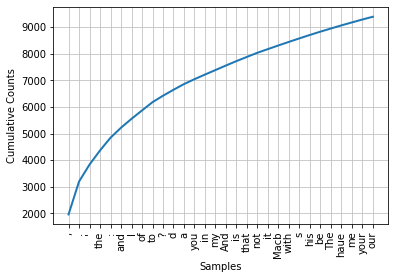

[(',', 8.478824546240277), ('.', 5.337078651685394), ("'", 2.752808988764045), ('the', 2.2947277441659466), (':', 2.0613656006914436), ('and', 1.6248919619706137), ('I', 1.439066551426102), ('of', 1.3612791702679343), ('to', 1.3439930855661193), ('?', 1.0414866032843562), ('d', 0.9680207433016422), ('a', 0.9248055315471045), ('you', 0.7951598962834918), ('in', 0.7476231633535004), ('And', 0.7346585998271391), ('my', 0.7346585998271391), ('is', 0.7173725151253241), ('that', 0.682800345721694), ('not', 0.6698357821953328), ('it', 0.5963699222126189), ('Macb', 0.592048401037165), ('with', 0.5790838375108038), ('s', 0.5661192739844425), ('his', 0.557476231633535), ('be', 0.5358686257562663), ('The', 0.5099394987035436), ('haue', 0.5056179775280899), ('me', 0.47968885047536736), ('your', 0.47536732929991354), ('our', 0.44511668107173724), ('-', 0.43215211754537597), ('him', 0.3889369057908384), ('for', 0.3543647363872083), ('That', 0.34572169403630076), ('Enter', 0.34572169403630076), ('thi

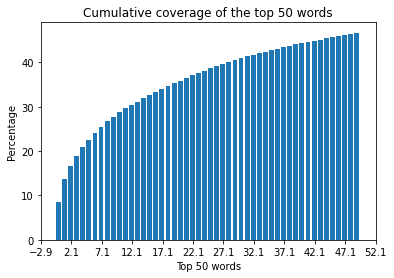





-------------For word in file whitman-leaves.txt-----------


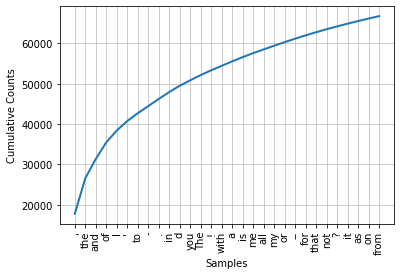

[(',', 11.43637455369537), ('the', 5.690747209183707), ('and', 3.0971765784495395), ('of', 2.664591982335053), ('I', 1.893041844489066), ("'", 1.525022113466294), ('to', 1.2461018962700878), ('-', 1.1453807067270132), ('.', 1.1421524634724276), ('in', 1.1066417876719847), ('d', 1.0194792197981701), ('you', 0.8683974354835585), ('The', 0.8380519488904528), ('!', 0.7631567053840641), ('with', 0.7173156511689469), ('a', 0.7082765700561069), ('is', 0.6863245159249239), ('me', 0.6340269752006353), ('all', 0.6030358399566124), ('my', 0.5843120290800152), ('or', 0.5778555425708438), ('--', 0.5571947857414952), ('for', 0.5326601370066437), ('that', 0.4971494612062008), ('not', 0.49133862334794653), ('?', 0.44420627183099504), ('it', 0.4403323799254921), ('as', 0.4203172717470607), ('on', 0.39771956896496063), ('O', 0.3867435418993692), ('from', 0.3867435418993692), ('s', 0.3854522445975349), ('are', 0.3796414067392806), ('And', 0.3467133255425063), ('be', 0.3086200551383948), ('(', 0.298935325

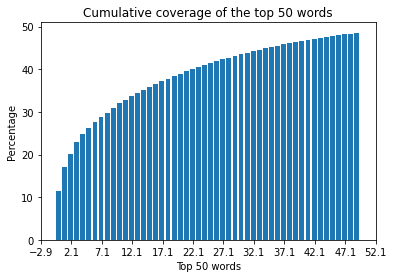

In [ ]:
for fileid in gutenberg.fileids():
  print(f'-------------For word in file {fileid}-----------')
  fdist1 = nltk.FreqDist(gutenberg.words(fileid))
  fdist1.most_common(50)
  fdist1.plot(30,cumulative=True)
  word_map = collect_word_map(gutenberg.words(fileid))
  print(collect_percentage_map(word_map, 50))
  visualise_dist(word_map, 50)
  print('\n\n\n')